In [1]:
import torch
import matplotlib.pyplot as plt
from experiment import Experiment
from constants import device
from nltk.tokenize import word_tokenize
from caption_utils import bleu1, bleu4
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.dpi"] = 300

using device cuda:0


In [26]:
%%capture
exp = Experiment('default2')
test_loader = exp.test_loader()
test_coco = exp.test_coco()
vocab = exp.vocab()
model = exp.model()
model.eval()

In [30]:
counter = 0
scores = torch.zeros(1000)
for i, (img, caption, img_id) in enumerate(test_loader.dataset):
    counter += 1
    if counter > 1000:
        break
    refs = [d['caption'] for d in test_coco.imgToAnns[img_id]]
    ref_tokens = [word_tokenize(s.lower()) for s in refs]
    scores[i] = bleu1(ref_tokens, vocab.decode(model.generate(img[None,...].to(device), 20, 0.4).tolist())[0])
# scores.argsort(descending=True)

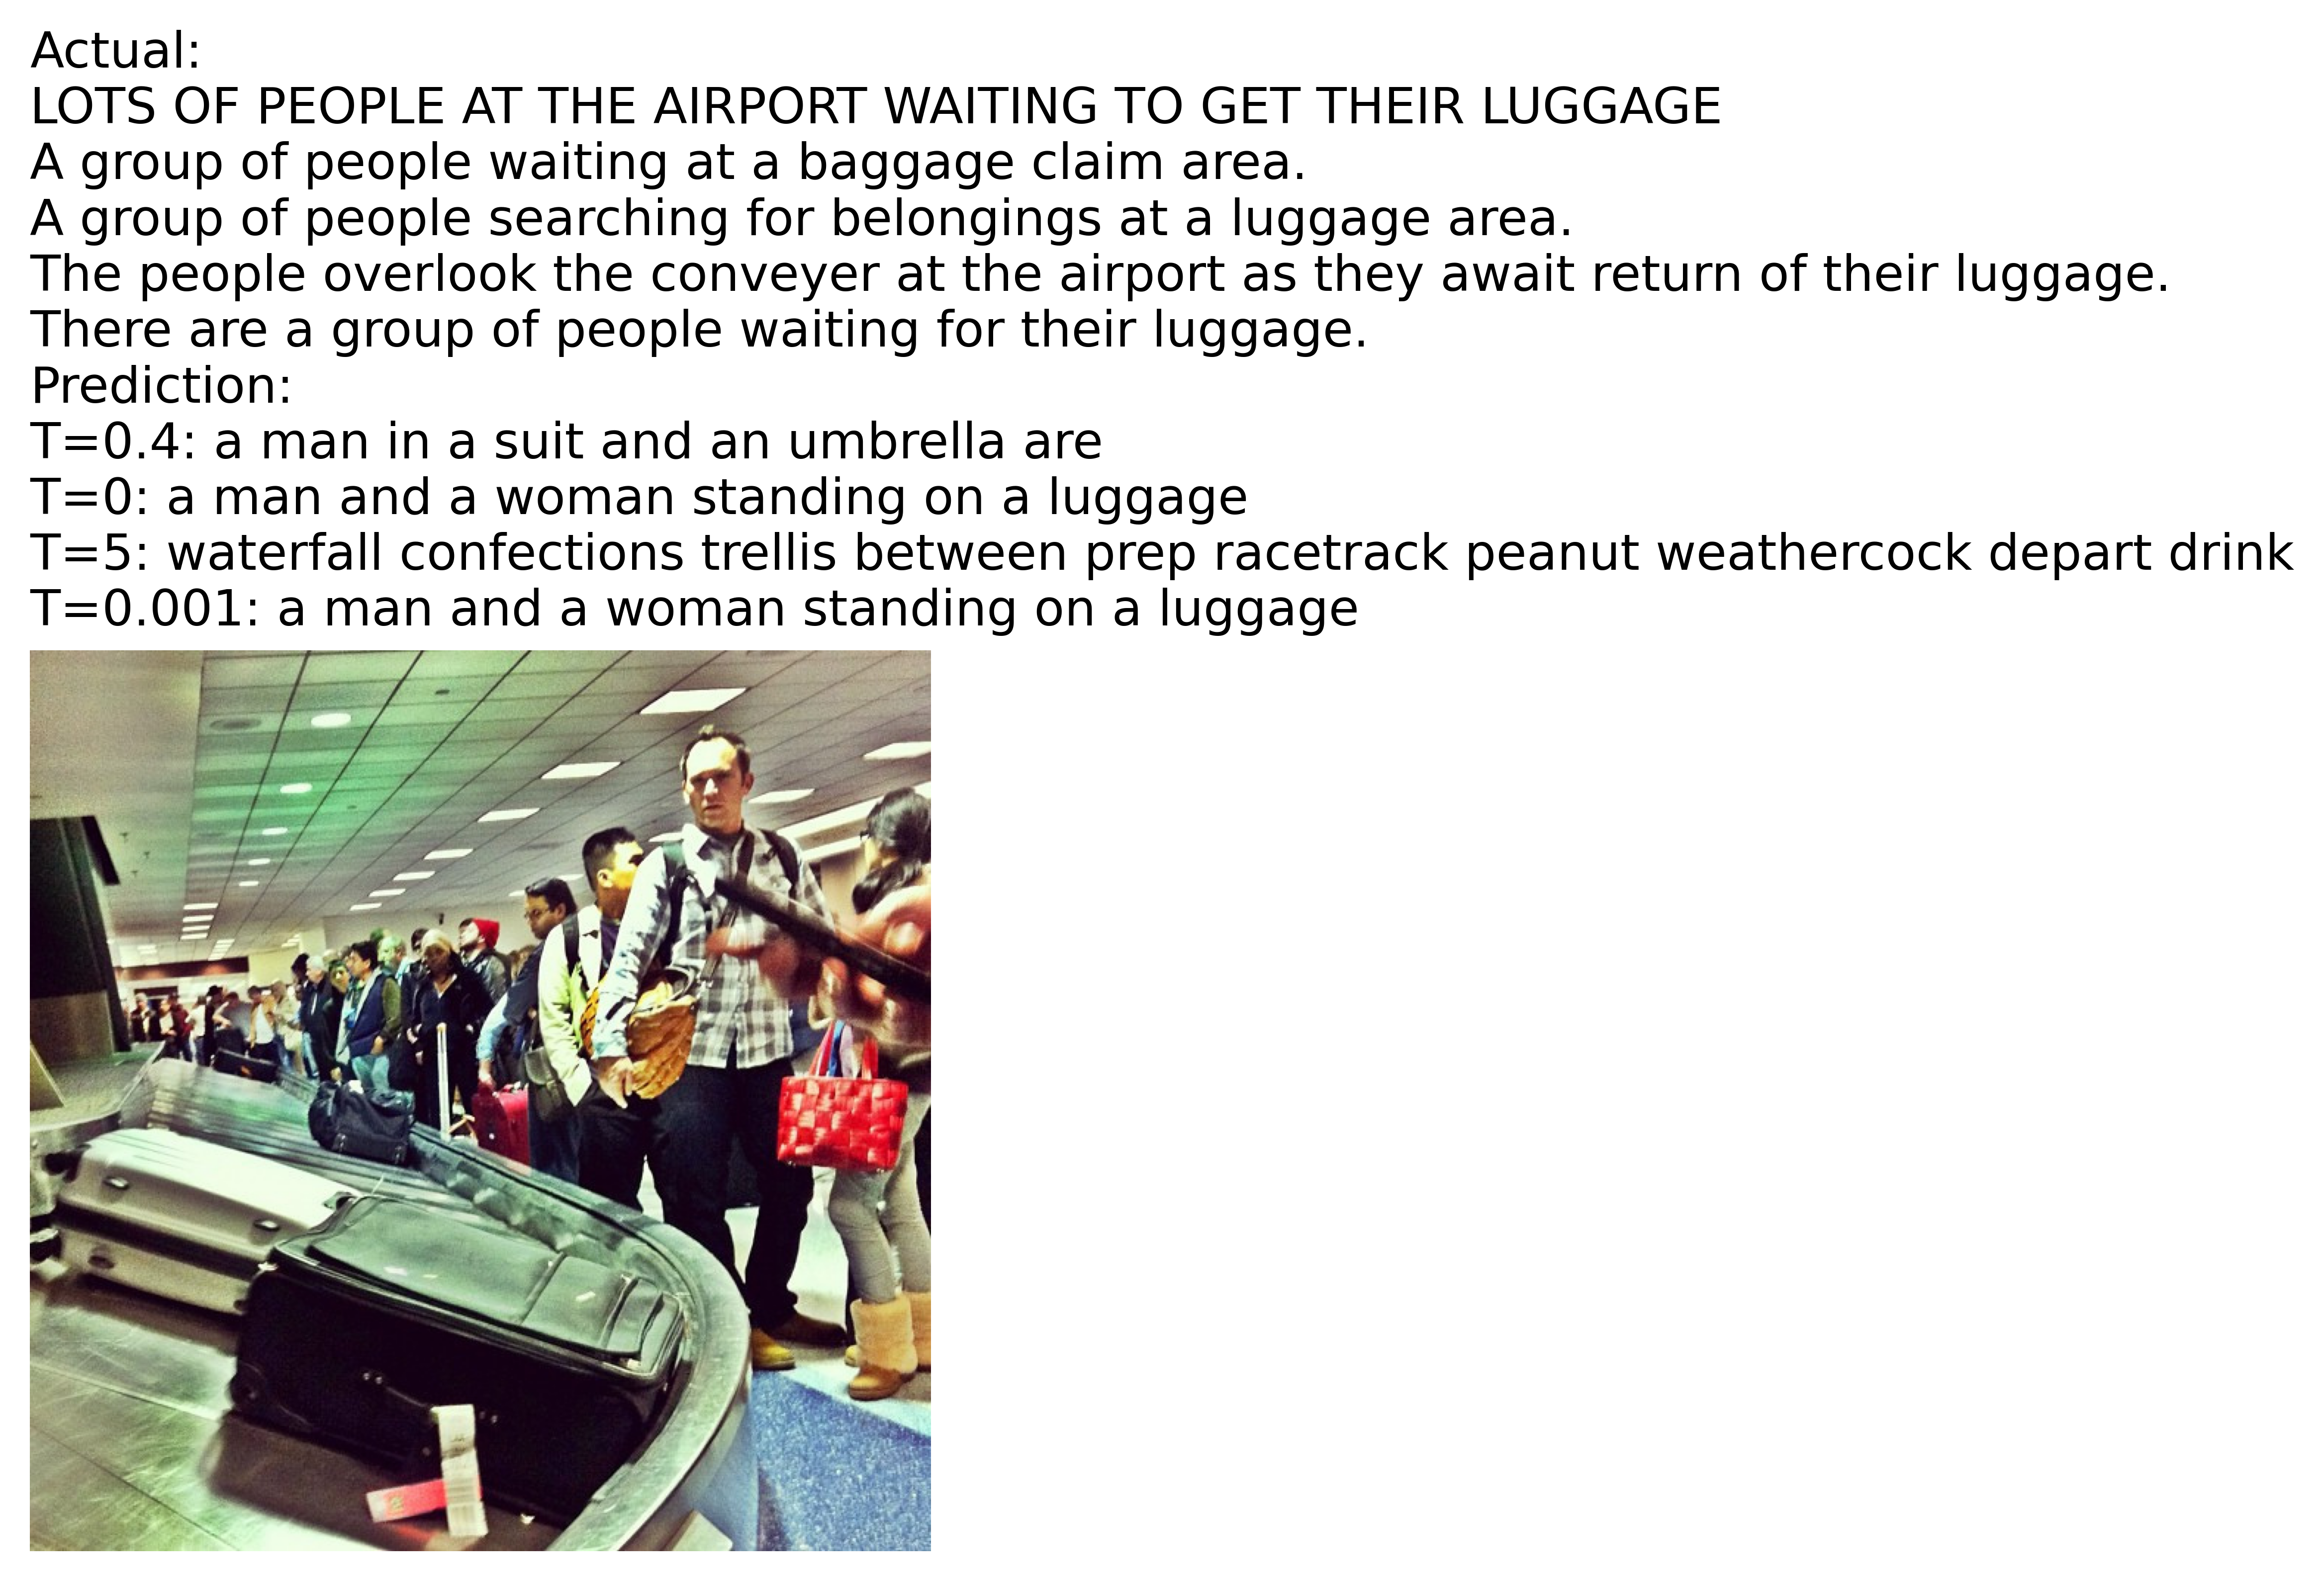

In [33]:
temps = (0.4,0,5,0.001)

for i,index in enumerate(scores.argsort()[:3]):
# for i,index in enumerate(scores.argsort(descending=True)[:3]):
    img, caption, img_id = test_loader.dataset[index]

    mat_img = plt.imread('data/images/test/'+test_coco.loadImgs(img_id)[0]['file_name'])
    plt.imshow(mat_img)

    preds = (' '.join(vocab.decode(model.generate(img[None,...].to(device), 10, t).tolist())[0]) for t in temps)
    
    plt.title(f"""Actual:
{chr(10).join(d['caption'] for d in test_coco.imgToAnns[img_id])}
Prediction:
{chr(10).join(f'T={t}: {pred}' for t,pred in zip(temps,preds))}""",loc='left')
    plt.axis('off')
    plt.savefig(f'imgs/Architecture2_bad_{i}.png',bbox_inches='tight')
    